In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2, chi2_contingency 
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r'C:\Users\User\Desktop\DATA SCIENCE\Kaggle Projects\Pizza price prediction\pizza_v1.csv')
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no
4,A,"Rp248,000",18.0,mozzarella,double_signature,jumbo,yes,no


In [3]:
df.shape

(129, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       129 non-null    object 
 1   price_rupiah  129 non-null    object 
 2   diameter      129 non-null    float64
 3   topping       129 non-null    object 
 4   variant       129 non-null    object 
 5   size          129 non-null    object 
 6   extra_sauce   129 non-null    object 
 7   extra_cheese  129 non-null    object 
dtypes: float64(1), object(7)
memory usage: 8.2+ KB


In [5]:
df.isnull().sum()

company         0
price_rupiah    0
diameter        0
topping         0
variant         0
size            0
extra_sauce     0
extra_cheese    0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diameter,129.0,12.976744,3.272674,8.0,12.0,12.0,14.0,22.0


### Changing the data type 

In [7]:
#Changing the datatype of the diameter column
df['diameter']=df['diameter'].astype('float64')

In [8]:
#Removing Rp in price_rupiah column and changing its datatype
df['price_rupiah']=df['price_rupiah'].str.replace('Rp','').str.replace(',','')

In [9]:
df['price_rupiah']=df['price_rupiah'].astype('float64')

### Descriptive Statistics 

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price_rupiah,129.0,87151.162791,44706.097732,23500.0,51000.0,78000.0,105000.0,248000.0
diameter,129.0,12.976744,3.272674,8.0,12.0,12.0,14.0,22.0


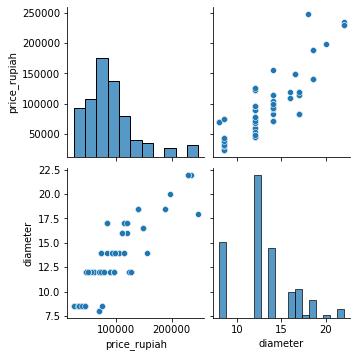

In [11]:
sns.pairplot(df)

### price_rupiah [Target Variable]

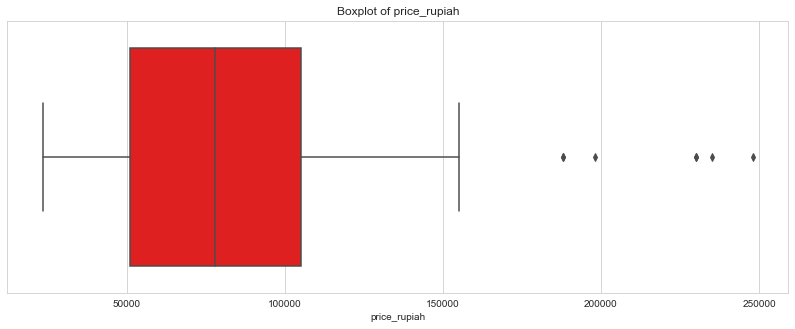

In [14]:
plt.figure(figsize=(14,5))
sns.boxplot(df.price_rupiah,color='r')
sns.set_style('darkgrid')
plt.title('Boxplot of price_rupiah')
plt.show()

In [15]:
IQR = df.price_rupiah.describe()['75%'] - df.price_rupiah.describe()['25%']
ul = df.price_rupiah.describe()['75%'] + 1.5 * IQR
len(df[df.price_rupiah > ul])

7

* 7 outliers are there

In [16]:
q3 = df.price_rupiah.quantile(0.75)
q1 = df.price_rupiah.quantile(0.25)
IQR = q3 - q1
ul = q3 + (1.5 * IQR)
ul
outliers = df.price_rupiah > ul

In [17]:
df.drop(index = df[outliers].index, inplace = True )

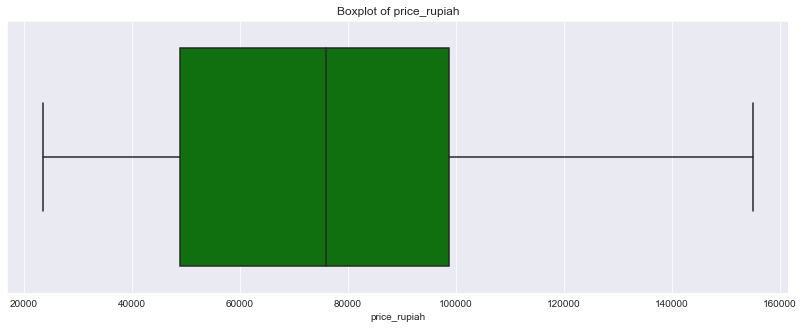

In [18]:
plt.figure(figsize=(14,5))
sns.boxplot(df.price_rupiah,color='g')
sns.set_style('darkgrid')
plt.title('Boxplot of price_rupiah')
plt.show()

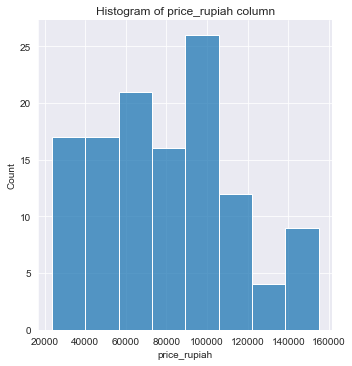

In [19]:
sns.displot(df.price_rupiah)
plt.title('Histogram of price_rupiah column')
plt.show()

<AxesSubplot:xlabel='price_rupiah', ylabel='Density'>

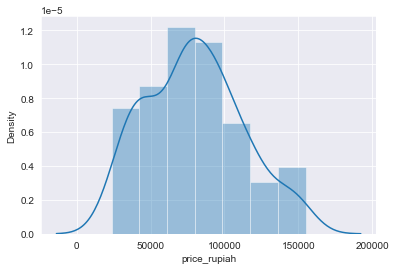

In [20]:
sns.distplot(df.price_rupiah)

### diameter 

In [21]:
round(df.price_rupiah.groupby(df.diameter).mean())

diameter
8.0      70000.0
8.5      37841.0
12.0     74633.0
14.0     93417.0
16.0    112000.0
16.5    149000.0
17.0     99800.0
18.5    140000.0
Name: price_rupiah, dtype: float64

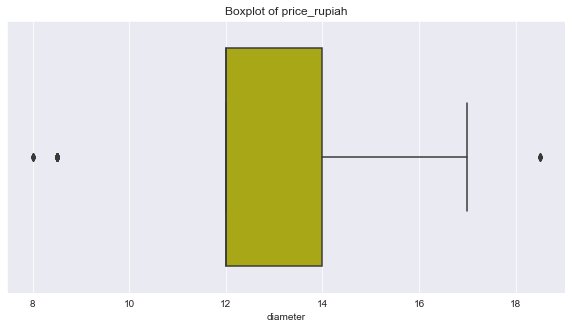

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(df.diameter,color='y')
sns.set_style('darkgrid')
plt.title('Boxplot of price_rupiah')
plt.show()

In [23]:
q3 = df.diameter.quantile(0.75)
q1 = df.diameter.quantile(0.25)
IQR = q3 - q1
ll = q3 - (1.5 * IQR)
ll
outliers = df.diameter < ll
df.drop(index = df[outliers].index, inplace = True )

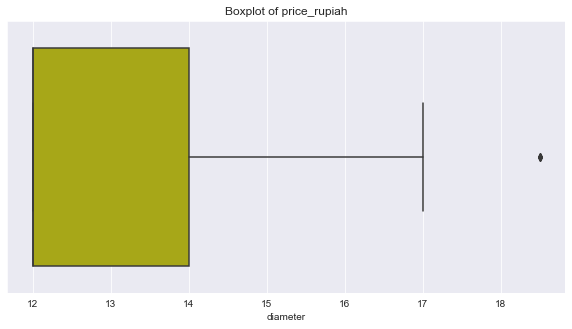

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(df.diameter,color='y')
sns.set_style('whitegrid')
plt.title('Boxplot of price_rupiah')
plt.show()

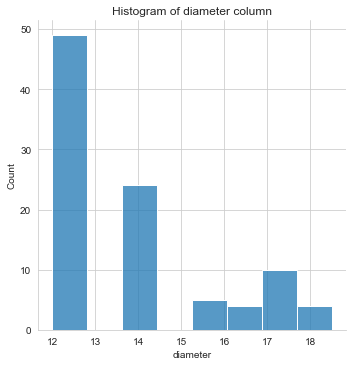

In [25]:
sns.displot(df.diameter)
plt.title('Histogram of diameter column')
plt.show()

<Figure size 720x360 with 0 Axes>

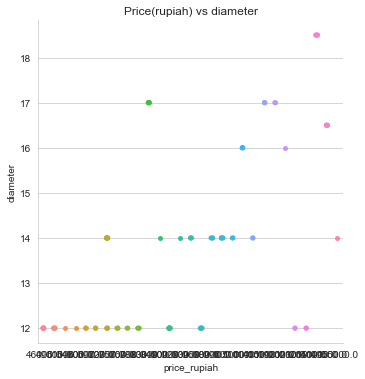

In [26]:
plt.figure(figsize=(10,5))
sns.catplot(x='price_rupiah',y='diameter',data=df)
plt.title('Price(rupiah) vs diameter')
plt.show()

<AxesSubplot:xlabel='diameter', ylabel='Density'>

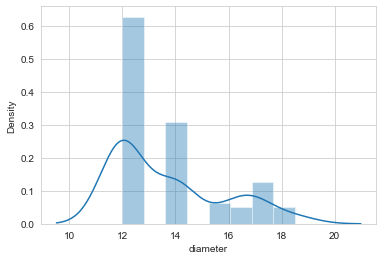

In [27]:
sns.distplot(df.diameter)

In [28]:
#Checking if diameter is a good predictor or not using pearson's correlation test
corr,_= pearsonr(df.diameter, df.price_rupiah)
print('Pearson correlation : ',corr)

Pearson correlation :  0.6350481751305213


### company 

In [29]:
df.company.value_counts()

E    24
B    20
C    20
A    17
D    15
Name: company, dtype: int64

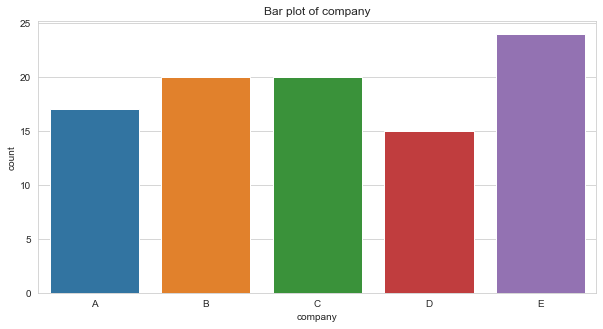

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(df.company)
plt.title('Bar plot of company')
plt.show()

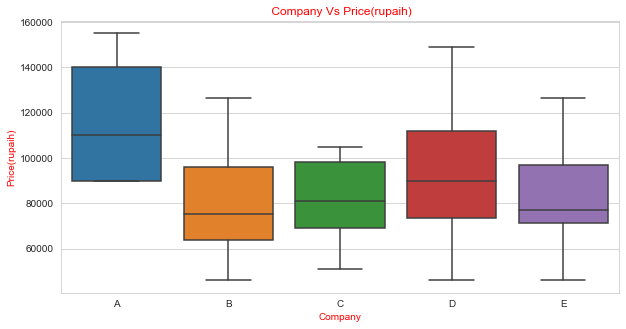

In [31]:
plt.figure(figsize=(10,5))
sns.boxplot(x = 'company', y= 'price_rupiah', data = df)
plt.xlabel('Company', color = "r")
plt.ylabel('Price(rupaih)', color = 'r')
plt.title(' Company Vs Price(rupaih)', color = 'r')
plt.show()

In [32]:
#Annova test
from statsmodels.formula.api import ols
mod = ols('price_rupiah ~ company',data = df).fit()
sm.stats.anova_lm(mod)

,df,sum_sq,mean_sq,F,PR(>F)
company,4.0,1.686705e+10,4.216762e+09,6.543318,0.000113
Residual,91.0,5.864386e+10,6.444380e+08,NaN,NaN


In [33]:
rslt = pairwise_tukeyhsd(df.price_rupiah, df.company, alpha = 0.05)
print(rslt)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
     A      B -35969.1176  0.001 -59277.0826 -12661.1527   True
     A      C -34594.1176  0.001 -57902.0826 -11286.1527   True
     A      D -21294.1176 0.1334 -46323.3685   3735.1332  False
     A      E  -34189.951  0.001 -56587.7219   -11792.18   True
     B      C      1375.0    0.9 -20968.0754  23718.0754  False
     B      D     14675.0 0.4453  -9458.2797  38808.2797  False
     B      E   1779.1667    0.9 -19612.6994  23171.0328  False
     C      D     13300.0 0.5378 -10833.2797  37433.2797  False
     C      E    404.1667    0.9 -20987.6994  21796.0328  False
     D      E -12895.8333 0.5324 -36151.2436  10359.5769  False
---------------------------------------------------------------


* p < 0.05 therefore statistically it is a good predictor.

### topping  

In [34]:
df.topping.value_counts()

chicken         22
mozzarella      17
mushrooms       16
smoked beef     16
vegetables       6
tuna             6
meat             5
black papper     3
beef             2
sausage          2
onion            1
Name: topping, dtype: int64

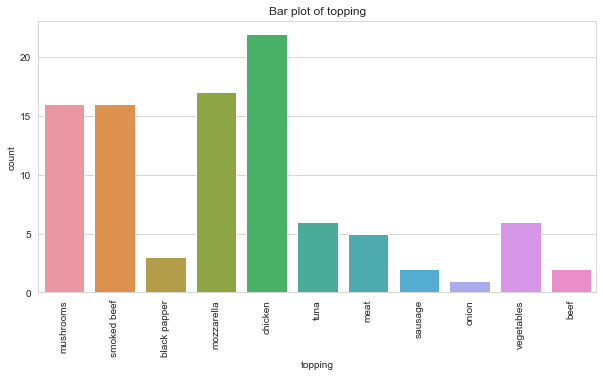

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(df.topping)
plt.title('Bar plot of topping')
plt.xticks(rotation = 90)
plt.show()


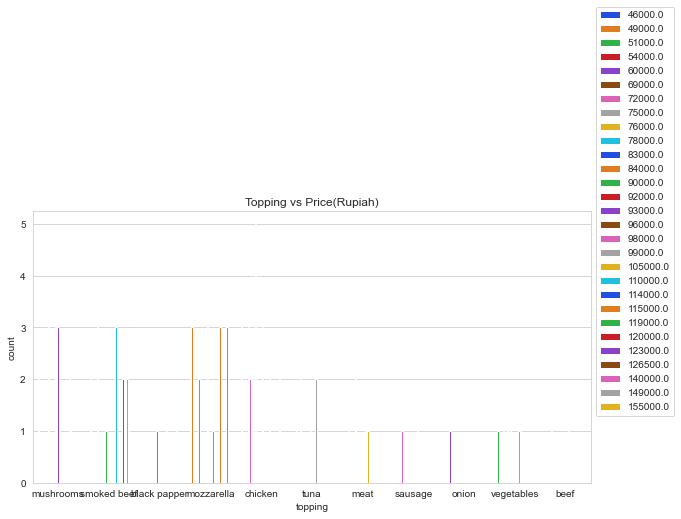

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(df.topping,hue=df.price_rupiah,palette='bright')
plt.legend(loc='center left', bbox_to_anchor=(1, 1))
plt.title('Topping vs Price(Rupiah)')
plt.show()

In [37]:
#Annova Test
mod = ols('price_rupiah ~ topping',data = df).fit()
sm.stats.anova_lm(mod)

,df,sum_sq,mean_sq,F,PR(>F)
topping,10.0,8.264386e+09,8.264386e+08,1.044623,0.41403
Residual,85.0,6.724652e+10,7.911355e+08,NaN,NaN


In [38]:
rslt = pairwise_tukeyhsd(df.price_rupiah, df.topping, alpha = 0.05)
print(rslt)

            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
   group1       group2      meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------------------
        beef black papper  34333.3333    0.9  -50600.8509 119267.5176  False
        beef      chicken      6000.0    0.9  -62715.1384  74715.1384  False
        beef         meat      4800.0    0.9  -73043.4657  82643.4657  False
        beef   mozzarella  10176.4706    0.9  -59375.6675  79728.6087  False
        beef    mushrooms      9500.0    0.9  -60280.5529  79280.5529  False
        beef        onion    -19000.0    0.9 -132951.1658  94951.1658  False
        beef      sausage      6500.0    0.9  -86540.7373  99540.7373  False
        beef  smoked beef     26375.0    0.9  -43405.5529  96155.5529  False
        beef         tuna   2333.3333    0.9  -73634.1105  78300.7772  False
        beef   vegetables      2500.0    0.9  -73467.4439  78467.4439  False

* Topping is a bad predictor 

### variant

In [143]:
df.variant.value_counts()

classic              20
new_york             10
crunchy              10
double_decker         9
meat_lovers           8
double_mix            6
super_supreme         4
american_favorite     4
BBQ_meat_fiesta       3
spicy tuna            2
meat_eater            2
gournet_greek         2
neptune_tuna          2
BBQ_sausage           2
thai_veggie           2
spicy_tuna            2
italian_veggie        2
double_signature      2
american_classic      2
extravaganza          2
Name: variant, dtype: int64

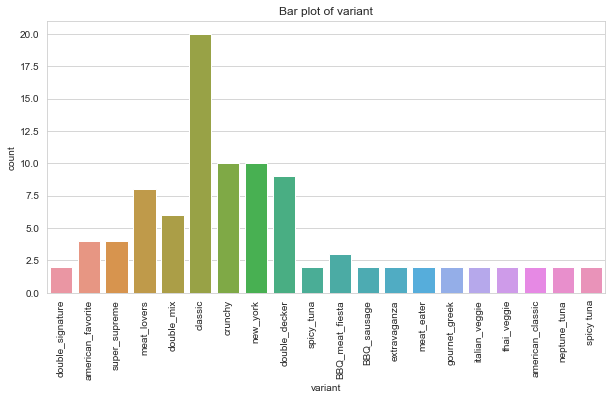

In [145]:
plt.figure(figsize=(10,5))
sns.countplot(df.variant)
plt.title('Bar plot of variant')
plt.xticks(rotation = 90)
plt.show()

In [147]:
#Annova Test
mod = ols('price_rupiah ~ variant',data = df).fit()
sm.stats.anova_lm(mod)

,df,sum_sq,mean_sq,F,PR(>F)
variant,19.0,4.912702e+10,2.585632e+09,7.448033,7.816709e-11
Residual,76.0,2.638389e+10,3.471564e+08,NaN,NaN


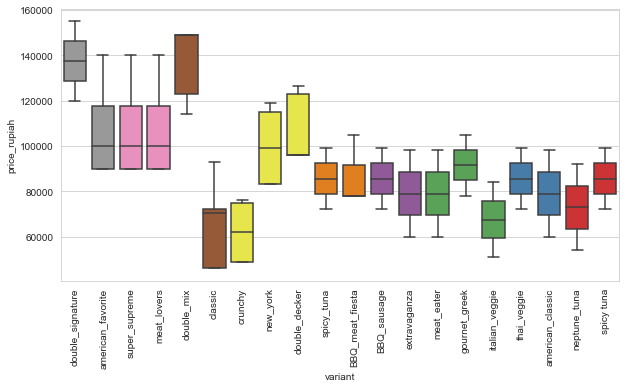

In [152]:
plt.figure(figsize=(10,5))
sns.boxplot(x = 'variant', y = 'price_rupiah', data = df,palette = 'Set1_r')
plt.xticks(rotation  = 90)
plt.show()

* If there are box plot of same level then merge both together.

In [148]:
rslt = pairwise_tukeyhsd(df.price_rupiah, df.variant, alpha = 0.05)
print(rslt)

                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                  
      group1            group2        meandiff  p-adj     lower        upper    reject
--------------------------------------------------------------------------------------
  BBQ_meat_fiesta       BBQ_sausage     -1500.0    0.9  -63951.4752  60951.4752  False
  BBQ_meat_fiesta  american_classic     -8000.0    0.9  -70451.4752  54451.4752  False
  BBQ_meat_fiesta american_favorite     20500.0    0.9  -31750.6529  72750.6529  False
  BBQ_meat_fiesta           classic    -21400.0    0.9  -63756.6512  20956.6512  False
  BBQ_meat_fiesta           crunchy    -24800.0 0.8703  -69834.3992  20234.3992  False
  BBQ_meat_fiesta     double_decker  21777.7778    0.9  -23830.3311  67385.8867  False
  BBQ_meat_fiesta        double_mix  50333.3333 0.0326    1958.6287   98708.038   True
  BBQ_meat_fiesta  double_signature     50500.0 0.2759  -11951.4752 112951.4752  False
  BBQ_meat_fiesta      extravaganza     -80

In [40]:
df.variant.replace(to_replace=['super_supreme'],value=['meat_lovers'],inplace=True)

In [41]:
df.variant.replace(to_replace=['american_favorite'],value=['meat_lovers'],inplace=True)

In [42]:
df.variant.replace(to_replace=['extravaganza '],value=['meat_eater'],inplace=True)

In [43]:
df.variant.replace(to_replace=['meat_eater'],value=['meat_lovers'],inplace=True)

In [48]:
df.variant.replace(to_replace=['spicy_tuna'],value=['BBQ_sausage'],inplace=True)

In [45]:
df.variant.replace(to_replace=['BBQ_meat_fiesta'],value=['BBQ_sausage'],inplace=True)

In [47]:
df.variant.replace(to_replace=['thai_veggie'],value=['spicy tuna'],inplace=True)

In [51]:
df.variant.replace(to_replace=['extravaganza '],value=['american_classic'],inplace=True)

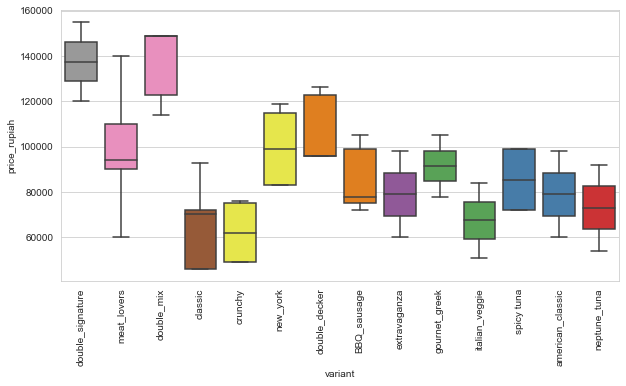

In [52]:
plt.figure(figsize=(10,5))
sns.boxplot(x = 'variant', y = 'price_rupiah', data = df,palette = 'Set1_r')
plt.xticks(rotation  = 90)
plt.show()

* p < 0.05 null hypothesis is accepted so therefore variant is a bad predictor

### extra_cheese   

In [39]:
df.extra_cheese.value_counts()

yes    6
no     1
Name: extra_cheese, dtype: int64

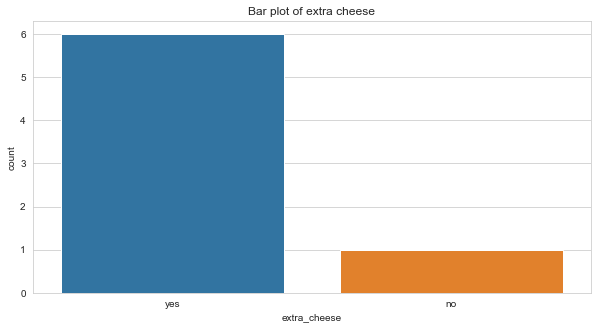

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(df.extra_cheese)
plt.title('Bar plot of extra cheese')
plt.show()

In [41]:
round(df.price_rupiah.groupby(df.extra_cheese).mean())

extra_cheese
no     248000.0
yes    211500.0
Name: price_rupiah, dtype: float64

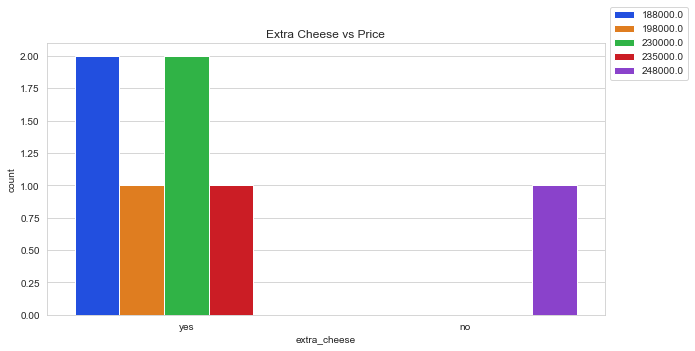

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(df.extra_cheese,hue=df.price_rupiah,palette='bright')
plt.legend(loc='center left', bbox_to_anchor=(1, 1))
plt.title('Extra Cheese vs Price')
plt.show()

In [79]:
#Annova Test
mod = ols('price_rupiah ~ extra_cheese',data = df).fit()
sm.stats.anova_lm(mod)

,df,sum_sq,mean_sq,F,PR(>F)
extra_cheese,1.0,1.141929e+09,1.141929e+09,2.262589,0.192863
Residual,5.0,2.523500e+09,5.047000e+08,NaN,NaN


* As p_value > 0.05 null hypothesis is accepted therefore it is a bad predictor

## Model Building 

### Using ols method 

In [44]:
df

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,235000.0,22.0,chicken,double_signature,jumbo,yes,yes
1,A,198000.0,20.0,papperoni,double_signature,jumbo,yes,yes
4,A,248000.0,18.0,mozzarella,double_signature,jumbo,yes,no
20,A,230000.0,22.0,chicken,double_mix,jumbo,yes,yes
21,A,188000.0,18.5,mushrooms,double_mix,jumbo,yes,yes
84,D,230000.0,22.0,chicken,double_mix,jumbo,yes,yes
85,D,188000.0,18.5,mushrooms,double_mix,jumbo,yes,yes


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 2 to 128
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       96 non-null     object 
 1   price_rupiah  96 non-null     float64
 2   diameter      96 non-null     float64
 3   topping       96 non-null     object 
 4   variant       96 non-null     object 
 5   size          96 non-null     object 
 6   extra_sauce   96 non-null     object 
 7   extra_cheese  96 non-null     object 
dtypes: float64(2), object(6)
memory usage: 8.8+ KB


In [58]:
#Splitting the data
df_train = df.iloc[0:65,]
df_test = df.iloc[65:,]

In [59]:
df_train.shape

(65, 8)

In [60]:
df_test.shape

(31, 8)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 2 to 128
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       96 non-null     object 
 1   price_rupiah  96 non-null     float64
 2   diameter      96 non-null     float64
 3   topping       96 non-null     object 
 4   variant       96 non-null     object 
 5   size          96 non-null     object 
 6   extra_sauce   96 non-null     object 
 7   extra_cheese  96 non-null     object 
dtypes: float64(2), object(6)
memory usage: 8.8+ KB


In [62]:
model1_1=smf.ols(formula='price_rupiah ~ variant + diameter'
               ,data=df_train).fit()
print(model1_1.summary()) 

                            OLS Regression Results                            
Dep. Variable:           price_rupiah   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     23.04
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           5.04e-17
Time:                        00:42:58   Log-Likelihood:                -695.33
No. Observations:                  65   AIC:                             1421.
Df Residuals:                      50   BIC:                             1453.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [63]:
model1_2=smf.ols(formula='price_rupiah~diameter+topping+variant+size+extra_cheese'
               ,data=df).fit()
print(model1_2.summary())

                            OLS Regression Results                            
Dep. Variable:           price_rupiah   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     18.77
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           4.93e-22
Time:                        00:43:14   Log-Likelihood:                -1019.2
No. Observations:                  96   AIC:                             2092.
Df Residuals:                      69   BIC:                             2162.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

### Using SGD method 

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

In [66]:
X = df.drop(['price_rupiah'], axis=1)
y = df['price_rupiah']

In [67]:
X.shape

(96, 7)

In [68]:
y.shape

(96,)

In [69]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [70]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
var_mod = X_train.select_dtypes(include='object').columns
for i in var_mod:
    X_train[i] = le.fit_transform(X_train[i])

In [71]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
var_mod = X_test.select_dtypes(include='object').columns
for i in var_mod:
    X_test[i] = le.fit_transform(X_test[i])

In [72]:
#Standardizing the data
sc_x = StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)

In [73]:
X_train.shape

(67, 7)

In [74]:
X_test.shape

(29, 7)

In [75]:
y_train.shape

(67,)

In [76]:
y_test.shape

(29,)

In [77]:
model=SGDRegressor()

In [78]:
model.fit(X_train,y_train)

SGDRegressor()

In [88]:
score=model.score(X_train,y_train)
print('R Squared:',score)

R Squared: 0.6550459742998569


In [80]:
#PREDICTION
y_pred=model.predict(X_test)

### RMSE 

In [87]:
mse=mean_squared_error(y_test,y_pred)
print('RMSE:',np.sqrt(mse))

RMSE: 20315.932197470025
